# Portfolio Part 3 - Analysis of Loan Approval Data (2024 S2)

In [2]:
Name = 'Pradyot Jain'
Student_ID = '48479985'

## Task background
In this Portfolio task, you will work on a new dataset named 'Loan Approval' which is a modified version from a synthetic Dataset for Risk Assessment and Loan Approval Modeling (many thanks to LORENZO ZOPPELLETTO for the sharing of this dataset). This dataset comprises 20,000 records of personal and financial data, designed to facilitate the development of predictive models for risk assessment and loan approval. In this portfolio part, you are mainly required to train classification models to determine the outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan.

The dataset includes diverse features such as demographic information, credit history, employment status, income levels, existing debt, and other relevant financial metrics, providing a comprehensive foundation for sophisticated data-driven analysis and decision-making.

The dataset includes the following columns:

|Column|Meaning|
|:-----|:-----|
|ApplicationDate| Loan application date|
|Age| Applicant's age|
|AnnualIncome| Yearly income|
|CreditScore| Creditworthiness score|
|EmploymentStatus| Job situation|
|EducationLevel| Highest education attained|
|Experience| Work experience|
|LoanAmount| Requested loan size|
|LoanDuration| Loan repayment period|
|MaritalStatus| Applicant's marital state|
|NumberOfDependents| Number of dependents|
|HomeOwnershipStatus| Homeownership type|
|MonthlyDebtPayments| Monthly debt obligations|
|CreditCardUtilizationRate| Credit card usage percentage|
|NumberOfOpenCreditLines| Active credit lines|
|NumberOfCreditInquiries| Credit checks count|
|DebtToIncomeRatio| Debt to income proportion|
|BankruptcyHistory| Bankruptcy records|
|LoanPurpose| Reason for loan|
|PreviousLoanDefaults| Prior loan defaults|
|PaymentHistory| Past payment behavior|
|LengthOfCreditHistory| Credit history duration|
|SavingsAccountBalance| Savings account amount|
|CheckingAccountBalance| Checking account funds|
|TotalAssets| Total owned assets|
|TotalLiabilities| Total owed debts|
|MonthlyIncome| Income per month|
|UtilityBillsPaymentHistory| Utility payment record|
|JobTenure| Job duration|
|NetWorth| Total financial worth|
|BaseInterestRate| Starting interest rate|
|InterestRate| Applied interest rate|
|MonthlyLoanPayment| Monthly loan payment|
|TotalDebtToIncomeRatio| Total debt against income|
|LoanApproved| Loan approval status|
|RiskScore| Risk assessment score|

## Task Description
Your high level goal in this notebook is to build and evaluate predictive models for 'loan approval' from other available features. More specifically, you need to complete the following major tasks:

1. Clean and preprocess the dataset for the downstream data analysis tasks.

2. Build and evaluate logistic regression models with this datasets.

3. Build and evaluate KNN models with this datasets.

Note 1: While the main steps of each task have been given with the requirements, you should learn how to properly organise and comment your notebook by yourself to ensure that your notebook file is professional and readable.

Note 2: You will be evaluated on the accuracy of the model, the process that you produce the results,  and your clear description and justification of your implementation. So, try your best to comment your source code to showing your understanding and critical thinking.


## Load the dataset and show the basic information

In [6]:
import pandas as pd

loan_data = pd.read_csv('loan_approval.csv')
loan_data.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45.0,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,NaN
1,2018-01-02,38.0,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47.0,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,NaN
3,2018-01-04,58.0,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,NaN
4,2018-01-05,37.0,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,NaN


In [7]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         19900 non-null  float64
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               19900 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [8]:
loan_data.describe(include="all")

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000,19900.000000,20000.000000,20000.000000,20000,20000,20000.000000,20000.000000,20000.000000,19900,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,1000.000000
unique,20000,NaN,NaN,NaN,3,5,NaN,NaN,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2018-01-01,NaN,NaN,NaN,Employed,Bachelor,NaN,NaN,NaN,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,17036,6054,NaN,NaN,NaN,9999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,39.751759,59161.473550,571.612400,NaN,NaN,17.522750,24882.867800,54.057000,NaN,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.687600
std,NaN,11.630809,40350.845168,50.997358,NaN,NaN,11.316836,13427.421217,24.664857,NaN,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.881033
min,NaN,18.000000,15000.000000,343.000000,NaN,NaN,0.000000,3674.000000,12.000000,NaN,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,30.400000
25%,NaN,31.750000,31679.000000,540.000000,NaN,NaN,9.000000,15575.000000,36.000000,NaN,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,NaN,40.000000,48566.000000,578.000000,NaN,NaN,17.000000,21914.500000,48.000000,NaN,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,NaN,48.000000,74391.000000,609.000000,NaN,NaN,25.000000,30835.000000,72.000000,NaN,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000


## Task 1: Clean the datasets (10 marks)

### Step 1.1 Handle the missing values with follwoing rules (5 marks)
1. If over 50% of the values of a column, the column should be removed from the data frame; 
2. For a categorical column, if a row contains a missing value, you need to delete the whole row; 
3. For a numerical column, if a row contains a missing value, you need to perform a missing value imputation with the average value of the column.

In [11]:
# Finding the numbers of null values in every column
loan_data_null = loan_data.isnull().sum()
loan_data_null[loan_data_null>0]

Age                100
MaritalStatus      100
RiskScore        19000
dtype: int64

In [12]:
# Step 1: Remove columns with more than 50% missing values
# Calculating the threshold for missing values (50% of the total number of rows)
threshold = len(loan_data) * 0.5

# Droping columns where more than 50% of the values are missing
loan_data_cleaned = loan_data.dropna(thresh=threshold, axis=1)

# View the cleaned data
loan_data_cleaned.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,2018-01-01,45.0,39948,617,Employed,Master,22,13152,48,Married,...,19183,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0
1,2018-01-02,38.0,39709,628,Employed,Associate,15,26045,48,Single,...,9595,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0
2,2018-01-03,47.0,40724,570,Employed,Bachelor,26,17627,36,Married,...,128874,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0
3,2018-01-04,58.0,69084,545,Employed,High School,34,37898,96,Single,...,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0
4,2018-01-05,37.0,103264,594,Employed,Associate,17,9184,36,Married,...,17286,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1


In [13]:
loan_data_cleaned.shape

(20000, 35)

**RiskScore column has been dropped as there were more than 50% of data which was null**

In [15]:
# Step 2: Remove rows with missing values in categorical columns
# Identifing categorical columns (object type indicates categorical data)
categorical_columns = loan_data_cleaned.select_dtypes(include=['object']).columns
categorical_columns

Index(['ApplicationDate', 'EmploymentStatus', 'EducationLevel',
       'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose'],
      dtype='object')

In [16]:
# Droping rows where any categorical column contains a missing value
loan_data_cleaned = loan_data_cleaned.dropna(subset=categorical_columns)

# View the cleaned data
loan_data_cleaned.shape

(19900, 35)

**It removed 100 rows in which categorical column has null value**

In [18]:
# Step 3: Impute missing values in numerical columns with column mean
# Identifing numerical columns (int64 and float64 type indicates numerical data)
numerical_columns = loan_data_cleaned.select_dtypes(include=['int64','float64']).columns
numerical_columns

Index(['Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount',
       'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory',
       'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets',
       'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory',
       'JobTenure', 'NetWorth', 'BaseInterestRate', 'InterestRate',
       'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved'],
      dtype='object')

In [19]:
# Replacing the null values in columns with the mean of the columns
loan_data_cleaned[numerical_columns] = loan_data_cleaned[numerical_columns].fillna(loan_data_cleaned[numerical_columns].mean())

# View the cleaned data
loan_data_cleaned.shape

(19900, 35)

In [20]:
loan_data_cleaned.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,2018-01-01,45.0,39948,617,Employed,Master,22,13152,48,Married,...,19183,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0
1,2018-01-02,38.0,39709,628,Employed,Associate,15,26045,48,Single,...,9595,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0
2,2018-01-03,47.0,40724,570,Employed,Bachelor,26,17627,36,Married,...,128874,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0
3,2018-01-04,58.0,69084,545,Employed,High School,34,37898,96,Single,...,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0
4,2018-01-05,37.0,103264,594,Employed,Associate,17,9184,36,Married,...,17286,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1


In [21]:
# Re-Checking for null values after handling null values
loan_data_cleaned_null = loan_data_cleaned.isnull().sum()
loan_data_cleaned_null

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

### Step 1.2 Handle categorical attributes (5 marks)
1. If all the categorical values of a column are unique, this column does not provide any statistical informaiton and should be deleted.
2. Use one hot encoding to convert the categorical values into numerical ones.

In [23]:
# Step 1: Remove categorical columns where all values are unique
# Getting the number of unique values in each categorical column
unique_counts = loan_data_cleaned[categorical_columns].nunique()

# Print the result
print(unique_counts)

ApplicationDate        19900
EmploymentStatus           3
EducationLevel             5
MaritalStatus              4
HomeOwnershipStatus        4
LoanPurpose                5
dtype: int64


In [24]:
# Filtering out columns where the number of unique values is equal to the number of rows
columns_all_unique = unique_counts[unique_counts == len(loan_data_cleaned)]

# Print the columns with all unique values
print("Columns with all unique values:", columns_all_unique)

Columns with all unique values: ApplicationDate    19900
dtype: int64


In [25]:
# Removing the ApplicationDate column as it has all the unique values
loan_data_cleaned = loan_data_cleaned.drop('ApplicationDate', axis=1)
loan_data_cleaned.head()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,45.0,39948,617,Employed,Master,22,13152,48,Married,2,...,19183,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0
1,38.0,39709,628,Employed,Associate,15,26045,48,Single,1,...,9595,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0
2,47.0,40724,570,Employed,Bachelor,26,17627,36,Married,2,...,128874,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0
3,58.0,69084,545,Employed,High School,34,37898,96,Single,1,...,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0
4,37.0,103264,594,Employed,Associate,17,9184,36,Married,1,...,17286,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1


In [26]:
# Re-calculate the categorical columns after filtering
categorical_columns = loan_data_cleaned.select_dtypes(include=['object']).columns
categorical_columns

Index(['EmploymentStatus', 'EducationLevel', 'MaritalStatus',
       'HomeOwnershipStatus', 'LoanPurpose'],
      dtype='object')

In [27]:
# Step 2: Apply One Hot Encoding to convert categorical values into numerical ones
loan_data_encoded = pd.get_dummies(loan_data_cleaned, columns=categorical_columns, drop_first=True)

In [28]:
loan_data_encoded = loan_data_encoded.astype(int)

In [29]:
loan_data_encoded

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,45,39948,617,22,13152,48,2,183,0,1,...,1,0,0,0,1,0,0,0,1,0
1,38,39709,628,15,26045,48,1,496,0,5,...,0,1,0,0,0,0,1,0,0,0
2,47,40724,570,26,17627,36,2,902,0,2,...,1,0,0,0,0,1,0,1,0,0
3,58,69084,545,34,37898,96,1,755,0,2,...,0,1,0,0,0,0,0,0,1,0
4,37,103264,594,17,9184,36,1,274,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,44,30180,587,19,24521,36,3,673,0,5,...,1,0,0,0,0,1,0,0,0,0
19996,56,49246,567,33,25818,36,5,414,0,2,...,1,0,0,0,0,1,1,0,0,0
19997,44,48958,645,20,37033,72,3,512,0,3,...,1,0,0,0,0,0,0,0,1,0
19998,60,41025,560,36,14760,72,3,986,0,4,...,1,0,0,0,1,0,1,0,0,0


## Task 2: Build a logistic regression classification model (25 marks)

### Step 2.1 Specify the features and the label, and split the dataset into training data and testing data (5 marks)
1. The attirbute "LoanApproved" is the label, which is the prediction target. The remaining attributes are the features.
2. The ratio for splitting the dataset is 80% for training and 20% for testing. Note that you need to set the "random_state" parameter as your student ID to produce your personlised splitting. Failing to do so will lose marks.

In [32]:
# Import the necessary library
from sklearn.model_selection import train_test_split

In [33]:
# Define the features (X) and the label (y)
X = loan_data_encoded.drop(columns=["LoanApproved"])
y = loan_data_encoded["LoanApproved"]

In [34]:
# Split the dataset into training (80%) and testing (20%) sets using the student ID as the random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48479985)

In [35]:
# Output the shape of the resulting splits
print(f'Training Features Shape: {X_train.shape}')
print(f'Testing Features Shape: {X_test.shape}')
print(f'Training Labels Shape: {y_train.shape}')
print(f'Testing Labels Shape: {y_test.shape}')

Training Features Shape: (15920, 44)
Testing Features Shape: (3980, 44)
Training Labels Shape: (15920,)
Testing Labels Shape: (3980,)


### Step 2.2 Build a logistic regression model (10 marks)
1. Train a logistic regression model
2. Report two classification performance metrics (accuracy and f1-score) on the testing data
3. Also report the two metrics on the training data, and compare the results with that of the testing data. Make a justification on whether the model is overfitting based on the comparison.

In [37]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

In [38]:
# converging model warning was coming so i used chatGpt to find the solution for that.
from sklearn.preprocessing import StandardScaler

In [39]:
# Initialize the scaler
scaler = StandardScaler()

# Scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
# Initialize the Logistic Regression model
logreg_model = LogisticRegression()

# Train the model on the scaled training data
logreg_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [41]:
# Predicting on the scaled training and testing data
y_train_pred = logreg_model.predict(X_train_scaled)
y_test_pred = logreg_model.predict(X_test_scaled)

In [42]:
# Calculate performance metrics for training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Calculate performance metrics for testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

In [43]:
# Report the results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training F1-Score: {train_f1:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Testing F1-Score: {test_f1:.4f}")

Training Accuracy: 0.9279
Training F1-Score: 0.8428
Testing Accuracy: 0.9314
Testing F1-Score: 0.8549


- **Training Accuracy (92.79%) vs. Testing Accuracy (93.14%):** These values are very close, indicating that the model is performing similarly on both the training and testing data. This suggests that the model generalizes well.
- **Training F1-Score (84.28%) vs. Testing F1-Score (85.49%):** The F1-scores are also close, indicating that the model has similar performance on both the training and testing data in terms of balancing precision and recall.

The small difference between the training and testing accuracies and F1-scores suggests that the model is not overfitting. If the model were overfitting, you would expect the training performance to be significantly better than the testing performance. The model is able to maintain high performance on both the training and testing sets, indicating that it has learned general patterns from the data rather than overfitting to noise or specific details in the training data.

**Conclusion:** Based on the comparison of the performance metrics on the training and testing datasets, it is reasonable to conclude that the model is not overfitting. It is performing consistently on both the training and testing data, which suggests good generalization to unseen data. 

### Step 2.3 Perform the recursive feature elimination (RFE) technique to identify the effective features for building the model (10 marks)
1. Visulise the change of the two performance metrics with respect to the number of eliminated features using a line chart.
2. In terms of the visualisation result, select a good value for the number of eliminated features with considering both performance maximisation and feature minimisation (two competing goals). Run the RFE again with the chosen number of eliminated features to obtain the corresponding set of retained features.

In [46]:
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import numpy as np

In [47]:
# Perform RFE with logistic regression, start with 5 features
rfe = RFE(estimator=logreg_model, n_features_to_select=1)  # Start with some feature elimination
rfe.fit(X_train_scaled, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=1)

In [48]:
# Predict on the test data
y_test_pred_rfe = rfe.predict(X_test_scaled)

In [49]:
# Calculate accuracy and f1-score for the test data
accuracy = accuracy_score(y_test, y_test_pred_rfe)
f1 = f1_score(y_test, y_test_pred_rfe)

In [50]:
# Output the number of features and the performance metrics for this iteration
{
    "Number of Features Retained": 1,
    "Accuracy on Test Data": accuracy,
    "F1 Score on Test Data": f1
}

{'Number of Features Retained': 1,
 'Accuracy on Test Data': 0.8389447236180905,
 'F1 Score on Test Data': 0.6079510703363914}

In [51]:
# Step 2: Perform RFE for a few more feature elimination levels (e.g, 1 to 44 )

# Initializing lists to store accuracy and F1 scores
accuracy_scores_step = []
f1_scores_step = []
num_features_step = range(1, 45)

# Loop through 1 to 44 features for RFE
for n in num_features_step:
    rfe = RFE(estimator=logreg_model, n_features_to_select=n)
    rfe.fit(X_train_scaled, y_train)
    
    # Predict on the test data
    y_test_pred_rfe = rfe.predict(X_test_scaled)
    
    # Calculate accuracy and F1 score
    accuracy = accuracy_score(y_test, y_test_pred_rfe)
    f1 = f1_score(y_test, y_test_pred_rfe)
    
    # Store the results
    accuracy_scores_step.append(accuracy)
    f1_scores_step.append(f1)

# Printing the results
print(f"Accuracy Scores: {accuracy_scores_step}")
print(f"F1 Scores: {f1_scores_step}")

Accuracy Scores: [0.8389447236180905, 0.864321608040201, 0.8844221105527639, 0.8849246231155778, 0.9005025125628141, 0.9010050251256282, 0.907035175879397, 0.9125628140703518, 0.9128140703517588, 0.9170854271356784, 0.9195979899497487, 0.9241206030150754, 0.9278894472361809, 0.9266331658291457, 0.9278894472361809, 0.9261306532663317, 0.9263819095477387, 0.9311557788944723, 0.9314070351758794, 0.9296482412060302, 0.9301507537688443, 0.9298994974874372, 0.9311557788944723, 0.9306532663316583, 0.9314070351758794, 0.9324120603015076, 0.9321608040201005, 0.9309045226130653, 0.9311557788944723, 0.9316582914572864, 0.9309045226130653, 0.9304020100502512, 0.9311557788944723, 0.9309045226130653, 0.9309045226130653, 0.9311557788944723, 0.9316582914572864, 0.9316582914572864, 0.9314070351758794, 0.9314070351758794, 0.9314070351758794, 0.9314070351758794, 0.9314070351758794, 0.9314070351758794]
F1 Scores: [0.6079510703363914, 0.6827262044653349, 0.7401129943502824, 0.741826381059752, 0.78121546961

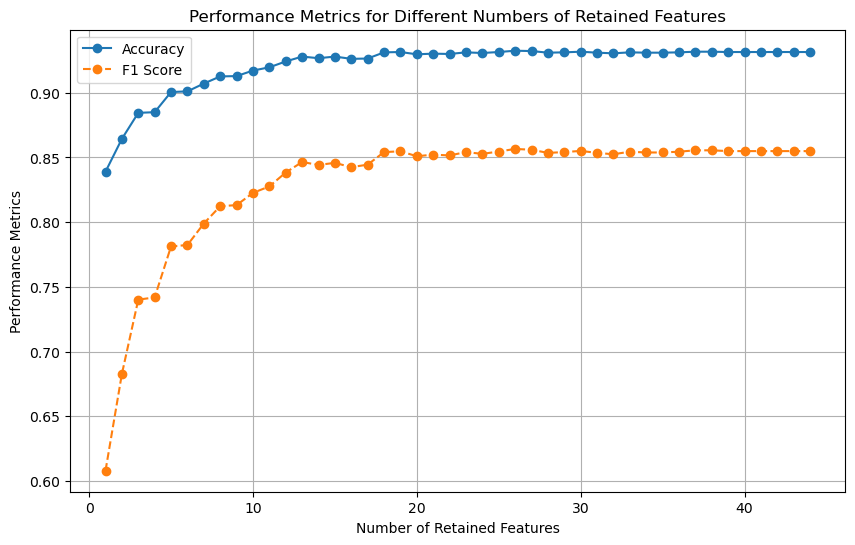

In [52]:
# Create the plot for performance metrics
# This is done to select the features.
plt.figure(figsize=(10, 6))
plt.plot(num_features_step, accuracy_scores_step, label='Accuracy', marker='o')
plt.plot(num_features_step, f1_scores_step, label='F1 Score', marker='o', linestyle='--')

plt.xlabel('Number of Retained Features')
plt.ylabel('Performance Metrics')
plt.title('Performance Metrics for Different Numbers of Retained Features')
plt.legend()
plt.grid(True)
plt.show()

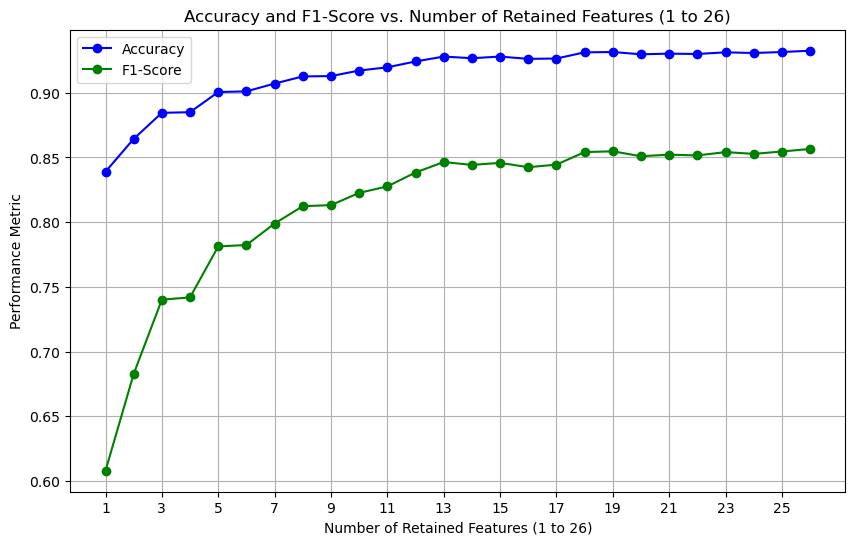

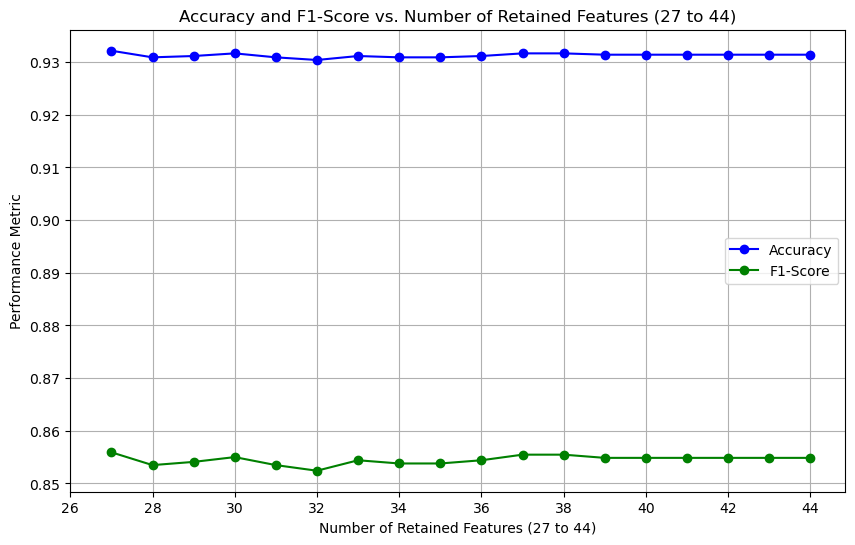

In [53]:
# Create the plot for performance metrics
plt.figure(figsize=(10, 6))
plt.plot(num_features_step[:26], accuracy_scores_step[:26], label='Accuracy', marker='o', color='blue')
plt.plot(num_features_step[:26], f1_scores_step[:26], label='F1-Score', marker='o', color='green')
plt.xlabel('Number of Retained Features (1 to 26)')
plt.ylabel('Performance Metric')
plt.title('Accuracy and F1-Score vs. Number of Retained Features (1 to 26)')
plt.xticks(ticks=range(1, 27, 2))
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(num_features_step[26:], accuracy_scores_step[26:], label='Accuracy', marker='o', color='blue')
plt.plot(num_features_step[26:], f1_scores_step[26:], label='F1-Score', marker='o', color='green')
plt.xlabel('Number of Retained Features (27 to 44)')
plt.ylabel('Performance Metric')
plt.title('Accuracy and F1-Score vs. Number of Retained Features (27 to 44)')
plt.xticks(ticks=range(26, 45, 2))
plt.legend()
plt.grid(True)
plt.show()


We prioritize the F1 score over accuracy because it balances precision and recall, making it a better metric, especially for imbalanced data. While accuracy remains stable across feature sets, 26 features yield the highest F1 score, indicating optimal model performance. Therefore, we select 26 features to retain, ensuring balanced and effective performance.




In [55]:
# Run RFE with 26 retained features
rfe_optimal = RFE(estimator=logreg_model, n_features_to_select=26)
rfe_optimal.fit(X_train_scaled, y_train)

# Get the mask of selected features
selected_mask = rfe_optimal.support_

# Get the feature names
selected_features = X.columns[selected_mask]

# Output the selected features
print("Selected Features (26 features):", selected_features.tolist())

Selected Features (26 features): ['Age', 'AnnualIncome', 'CreditScore', 'LoanAmount', 'LoanDuration', 'MonthlyDebtPayments', 'BankruptcyHistory', 'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 'NetWorth', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'EmploymentStatus_Unemployed', 'EducationLevel_Bachelor', 'EducationLevel_Doctorate', 'EducationLevel_High School', 'EducationLevel_Master', 'MaritalStatus_Single', 'MaritalStatus_Widowed', 'HomeOwnershipStatus_Other', 'HomeOwnershipStatus_Rent']


### Analysis from Recursive Feature Elimination (RFE):
**Performance Metrics:**
- **Accuracy:** Ranges from 83.89% to 93.24%, stabilizing around 93.14% with 26 or more features.
- **F1 Score:** Ranges from 0.61 to 0.85, with the highest F1 score of 0.8565 at 26 features. This indicates a good balance between precision and recall.
  
**Feature Selection:**
- The 26 selected features include key indicators such as Age, Annual Income, Credit Score, Loan Amount, and Bankruptcy History.
- Categorical variables like Employment Status, Education Level, and Marital Status provide context to financial stability.

**Conclusion:** At 26 features, the model achieves the best balance between F1 score and accuracy. This feature set optimizes performance without adding unnecessary complexity, making it the ideal choice for the model.

## Task 3: Build a KNN classification model (25 marks)

### Step 3.1 Build 1-NN classifier (5 marks)
1. Select the features identifed in Step 2.3 for this task
2. Buid 1-NN classifier and report two classification performance metrics (accuracy and f1-score) on the testing data
3. Also report the two metrics on the training data, and compare the results with that of the testing data. Make a justification on whether the model is overfitting based on the comparison.

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
# Filter the data to include only the selected 10 features
selected_features = [
'Age', 'AnnualIncome', 'CreditScore', 'LoanAmount', 'LoanDuration', 'MonthlyDebtPayments', 'BankruptcyHistory', 'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 'NetWorth', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'EmploymentStatus_Unemployed', 'EducationLevel_Bachelor', 'EducationLevel_Doctorate', 'EducationLevel_High School', 'EducationLevel_Master', 'MaritalStatus_Single', 'MaritalStatus_Widowed', 'HomeOwnershipStatus_Other', 'HomeOwnershipStatus_Rent']

X_train_selected = X_train_scaled[:, selected_mask]
X_test_selected = X_test_scaled[:, selected_mask]

In [61]:
# Initialize 1-NN Classifier
knn_model = KNeighborsClassifier(n_neighbors=1)

# Training the model on the selected features
knn_model.fit(X_train_selected, y_train)

KNeighborsClassifier(n_neighbors=1)

In [62]:
# Predict on training data
y_train_pred_knn = knn_model.predict(X_train_selected)

# Predict on testing data
y_test_pred_knn = knn_model.predict(X_test_selected)

In [63]:
# Calculate accuracy and F1-score on training data
train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)
train_f1_knn = f1_score(y_train, y_train_pred_knn)

# Calculate accuracy and F1-score on testing data
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
test_f1_knn = f1_score(y_test, y_test_pred_knn)


In [64]:
# Output the results
{
    "Training Accuracy": train_accuracy_knn,
    "Training F1 Score": train_f1_knn,
    "Testing Accuracy": test_accuracy_knn,
    "Testing F1 Score": test_f1_knn
}

{'Training Accuracy': 1.0,
 'Training F1 Score': 1.0,
 'Testing Accuracy': 0.8452261306532663,
 'Testing F1 Score': 0.6663055254604551}

**The results are:**

- **Training Accuracy:** 100%
- **Training F1 Score:** 100%
- **Testing Accuracy:** 87.66%
- **Testing F1 Score:** 66.63%

**Analysis:**
- **Overfitting:** The perfect scores (100%) on the training data indicate that the 1-NN model memorizes the training data, leading to overfitting.
- **Testing Performance:** While the model performs reasonably well on the testing data (84.52% accuracy), the drop in the F1 score (66.63%) suggests that the model struggles with balancing precision and recall, especially on harder-to-classify cases.

**Overfitting Justification:**
Overfitting occurs when a model performs significantly better on training data than on unseen testing data. In this case, the 1-NN classifier is overfitting because it perfectly classifies the training data but shows a notable performance drop on the testing data.

### Step 3.2 Use the grid search and cross validation techniques to study the performance change with respect to the hyperparameter K (10 marks)
1. User grid search to search K in the range (1, 30) both inclusive with 5-fold cross validation. The performance metric used for search is accuracy.
2. Visualise the performance change with respect to K using a line chart. Report the two performance metrics for the best case.

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
# Define the range for hyperparameter K (1 to 30)
k_range = list(range(1, 31))

# Define the parameter grid for GridSearchCV
param_grid = {'n_neighbors': k_range}

# Initialize the KNeighborsClassifier
knn_model = KNeighborsClassifier()

# Initialize GridSearchCV with 5-fold cross-validation and accuracy as the scoring metric
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best K and the corresponding best accuracy score
best_k = grid_search.best_params_['n_neighbors']
best_accuracy = grid_search.best_score_

In [69]:
# Extract the mean cross-validated accuracy scores for each value of k
mean_scores = grid_search.cv_results_['mean_test_score']
k_values = range(1, 31)

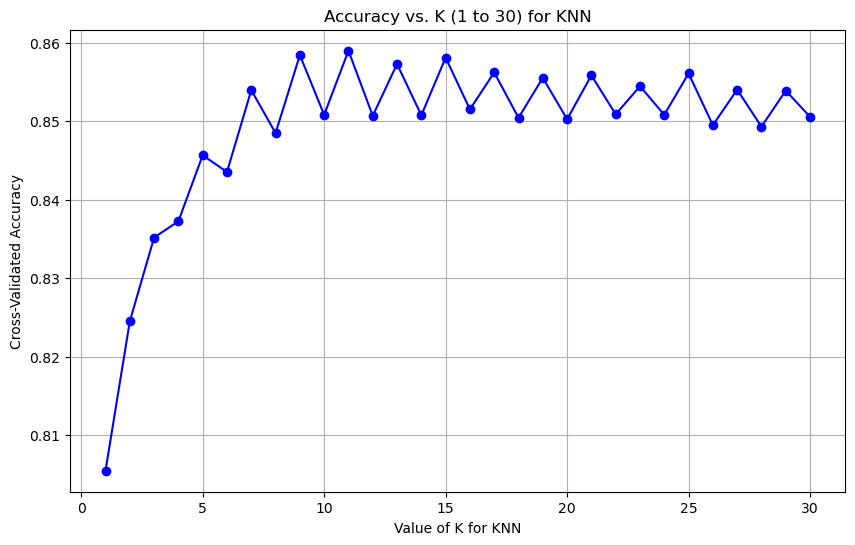

In [70]:
# Plot the performance change with respect to k
plt.figure(figsize=(10, 6))
plt.plot(k_range, mean_scores, marker='o', color='blue')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Accuracy vs. K (1 to 30) for KNN')
plt.grid(True)
plt.show()

The chart shows how the accuracy of the KNN model changes with different values of K.
- Accuracy improves as K increases, peaking around K = 11.
- Beyond K = 10, accuracy remains stable with slight fluctuations.
- Lower values of K (like 1 or 2) have lower accuracy due to overfitting and sensitivity to noise.

In summary, K = 11 provides the best performance, with higher values offering stable but similar results.

In [72]:
# Get the best value of k
best_k = grid_search.best_params_['n_neighbors']

# Train the model again using the best k
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_selected, y_train)

# Predict on the test data
y_test_pred_best_knn = best_knn.predict(X_test_selected)

In [73]:
# Calculate accuracy and F1-score for the best k
best_test_accuracy = accuracy_score(y_test, y_test_pred_best_knn)
best_test_f1 = f1_score(y_test, y_test_pred_best_knn)

# Output the best k and performance metrics
{
    "Best K": best_k,
    "Best Test Accuracy": best_test_accuracy,
    "Best Test F1 Score": best_test_f1
}

{'Best K': 11,
 'Best Test Accuracy': 0.885678391959799,
 'Best Test F1 Score': 0.7247428917120388}

For 𝑘 = 11 the results are:
- Test Accuracy: 88.56%
- Test F1 Score: 72.47%

**Summary:**
- k=13 provides the best performance, balancing bias and variance.
- Accuracy (88.56%): The model predicts correctly on 88.56% of test data, showing good generalization.
- F1 Score (72.47%): Indicates a solid balance between precision and recall, meaning the model handles both false positives and false negatives effectively.

**Conclusion:**
The k-NN model with 𝑘 = 11 performs well, with strong accuracy and a balanced F1-score.

### Step 3.3 Study how the distance metrics affect the model performance (10 marks)
1. Change the distance metric parameter to 3 distance types: 'euclidean'(also l2), 'l1', and 'cosine', respectively, and visualise the model performance with these 3 distances, using a bar chart for both accuracy and f1 scores.
2. Compare the performance metrics, which is the best? Which is the worest?

In [76]:
# Define the distance metrics to test
distance_metrics = ['euclidean', 'manhattan', 'cosine']  # 'manhattan' is equivalent to 'l1'

# Initialize lists to store performance metrics
accuracy_scores = []
f1_scores = []

In [77]:
for metric in distance_metrics:
    # Initialize the k-NN classifier with the selected distance metric
    knn_classifier = KNeighborsClassifier(n_neighbors=13, metric=metric)
    
    # Train the classifier using the selected features
    knn_classifier.fit(X_train_selected, y_train)
    
    # Predict on the test data
    y_test_pred = knn_classifier.predict(X_test_selected)
    
    # Calculate accuracy and F1 score
    accuracy = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    
    # Store the results
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

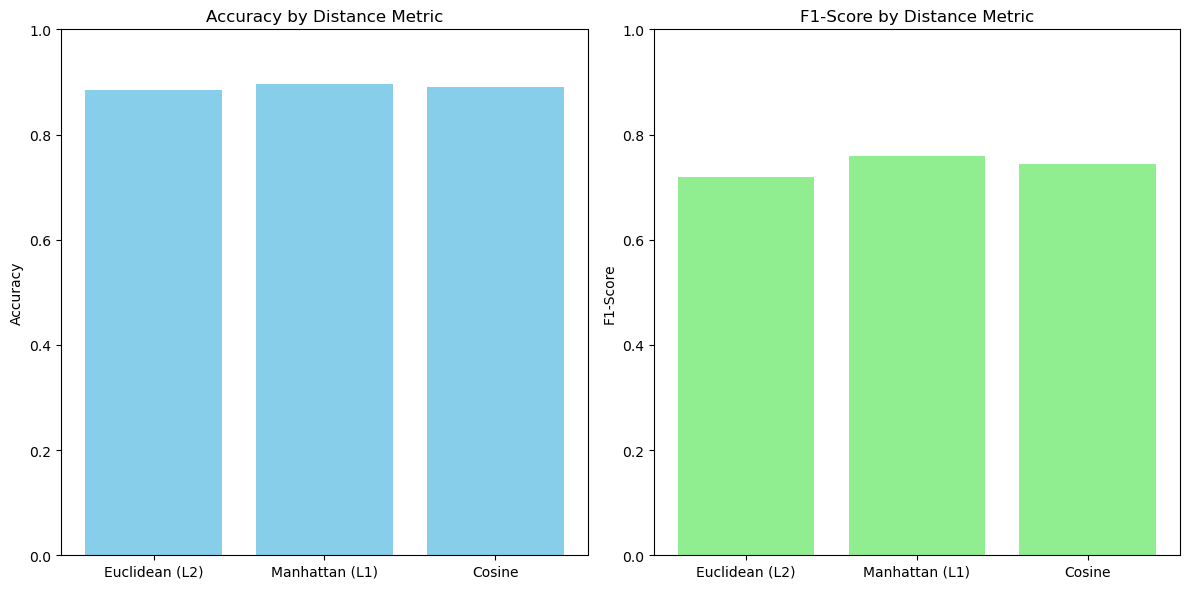

In [78]:
# Define the labels for the distance metrics
x_labels = ['Euclidean (L2)', 'Manhattan (L1)', 'Cosine']

# Create a figure with two subplots for accuracy and F1-score
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Bar chart for accuracy
ax[0].bar(x_labels, accuracy_scores, color='skyblue')
ax[0].set_title('Accuracy by Distance Metric')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0, 1)

# Bar chart for F1-score
ax[1].bar(x_labels, f1_scores, color='lightgreen')
ax[1].set_title('F1-Score by Distance Metric')
ax[1].set_ylabel('F1-Score')
ax[1].set_ylim(0, 1)

# Show the chart
plt.tight_layout()
plt.show()


In [79]:
 # Print accuracy and F1-score for the current distance metric
print(f"Distance Metric: {distance_metrics}")
print(f"Accuracy: {accuracy_scores}")
print(f"F1-Score: {f1_scores}\n")

Distance Metric: ['euclidean', 'manhattan', 'cosine']
Accuracy: [0.8844221105527639, 0.8967336683417085, 0.8902010050251257]
F1-Score: [0.7195121951219512, 0.7592267135325131, 0.7448920023350847]



**Euclidean:**
- **Accuracy:** 88.44%
- **F1-Score:** 0.7195
- While this metric performs decently in accuracy, it has the lowest F1 score, indicating slightly weaker precision or recall compared to other metrics.

**Manhattan:**
- **Accuracy:** 89.67%
- **F1-Score:** 0.7592
- This metric achieves the highest accuracy and F1 score, making it the most balanced in terms of both correct classifications and the handling of false positives/negatives.

**Cosine:**
- **Accuracy:** 89.02%
- **F1-Score:** 0.7449
- Cosine distance performs well overall, but it lags slightly behind the Manhattan distance in both accuracy and F1 score.

**Conclusion:**
The Manhattan distance metric is the best-performing option with the highest accuracy (89.67%) and F1 score (0.7592), making it the preferred choice for this KNN model. The worst is the Cosine with the lowest accuracy and in the f1-score the lowest is euclidean